In [115]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

mat = scipy.io.loadmat('data_hw5_3.mat')['R']

data = pd.DataFrame(mat, columns=None)

(1600, 2) (1600, 1)
(400, 2) (400, 1)


### Problem 7A: Visualize Data

Text(0.5, 1.0, 'X1 vs X2, colors indicate class')

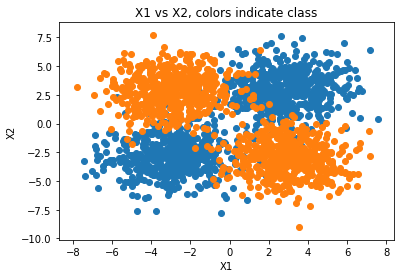

In [98]:
# Split data into classes and visualize
class1 = data[data[2]==1]
class2 = data[data[2]==2]

plt.scatter(class1[0], class1[1])
plt.scatter(class2[0], class2[1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('X1 vs X2, colors indicate class')

### Problem 7B: Logistic Regression

In [121]:
# Split data into train x and y
train_X , test_X, train_Y, test_Y = train_test_split(data[[0, 1]], data[[2]], test_size=0.2)
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(train_X, np.ravel(train_Y))
logistic_preds = logistic_model.predict(test_X)
print("Accuracy: ", accuracy_score(test_Y, logistic_preds))


(1600, 2) (1600, 1)
(400, 2) (400, 1)
Accuracy:  0.5025


### Problem 7C: Discussion
The accuracy score for logistic regression here is very poor, no better than guessing. This is because the data are linearly separable. Using higher-order terms of X1 and X2 as additional features might help improve the score.

In [111]:
# Split data into train x and y
train_X , test_X, train_Y, test_Y = train_test_split(data[[0, 1]], data[[2]], test_size=0.2)
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

# Build Keras model
n_cols = train_X.shape[1]

model = Sequential()
# Input layer
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
# 3 hidden layers
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# Output layer, predicts continuous output close to 1 or 2 given input data
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_Y, validation_split=0.2, epochs=30)

# Make predictions and round them so we can compare to actual values
preds = model.predict(test_X)
preds = [round(p[0]) for p in preds]

print("Accuracy: ", accuracy_score(test_Y, preds))


Train on 1280 samples, validate on 320 samples
Epoch 1/30
1280/1280 [==============================] - 0s 94us/step - loss: 3.8966 - val_loss: 2.5619
Epoch 2/30
1280/1280 [==============================] - 0s 23us/step - loss: 1.5773 - val_loss: 0.6972
Epoch 3/30
1280/1280 [==============================] - 0s 26us/step - loss: 0.3341 - val_loss: 0.1656
Epoch 4/30
1280/1280 [==============================] - 0s 22us/step - loss: 0.1650 - val_loss: 0.1353
Epoch 5/30
1280/1280 [==============================] - 0s 23us/step - loss: 0.1450 - val_loss: 0.1200
Epoch 6/30
1280/1280 [==============================] - 0s 21us/step - loss: 0.1298 - val_loss: 0.1082
Epoch 7/30
1280/1280 [==============================] - 0s 26us/step - loss: 0.1174 - val_loss: 0.0971
Epoch 8/30
1280/1280 [==============================] - 0s 21us/step - loss: 0.1067 - val_loss: 0.0891
Epoch 9/30
1280/1280 [==============================] - 0s 24us/step - loss: 0.0969 - val_loss: 0.0796
Epoch 10/30
1280/1280 [===